In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import itertools
import numpy as np

In [2]:
##load the collected results
general_grid_search_result_df_learned1 = pd.read_csv("C:/Users/jeane/_stage_IAAA/mri-dl-amu-2020/Pytorch-MRI-ML-recon-V1.1/experiment on mnist/result_final/general_grid_search_result_df_learned.csv", sep ="\t")
general_grid_search_result_df_fixed1 = pd.read_csv("C:/Users/jeane/_stage_IAAA/mri-dl-amu-2020/Pytorch-MRI-ML-recon-V1.1/experiment on mnist/result_final/general_grid_search_result_df_fixed.csv", sep ="\t")

best_result_df_learned1 = pd.read_csv("C:/Users/jeane/_stage_IAAA/mri-dl-amu-2020/Pytorch-MRI-ML-recon-V1.1/experiment on mnist/result_final/best_result_df_learned.csv", sep ="\t")
best_result_df_fixed1 = pd.read_csv("C:/Users/jeane/_stage_IAAA/mri-dl-amu-2020/Pytorch-MRI-ML-recon-V1.1/experiment on mnist/result_final/best_result_df_fixed.csv", sep ="\t")

general_grid_search_result_df_learned_oom = pd.read_csv("C:/Users/jeane/_stage_IAAA/mri-dl-amu-2020/Pytorch-MRI-ML-recon-V1.1/experiment on mnist/result_final/general_grid_search_result_df_learned_oom.csv", sep ="\t")
general_grid_search_result_df_fixed_oom = pd.read_csv("C:/Users/jeane/_stage_IAAA/mri-dl-amu-2020/Pytorch-MRI-ML-recon-V1.1/experiment on mnist/result_final/general_grid_search_result_df_fixed_oom.csv", sep ="\t")

general_grid_search_result_df_learned = pd.concat([general_grid_search_result_df_learned1, general_grid_search_result_df_learned_oom], ignore_index=True)
general_grid_search_result_df_fixed = pd.concat([general_grid_search_result_df_fixed1, general_grid_search_result_df_fixed_oom], ignore_index=True)


In [3]:
general_grid_search_result_df_learned.head()

,Unnamed: 0.1,Unnamed: 0,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
0,0,0,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.001,0.0010,0.290576,10.434100,0.481918,0.052786
1,1,0,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.001,0.0001,0.168252,9.600446,0.629078,0.064224
2,2,0,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.001,0.0100,0.233855,10.106347,0.720060,0.064251
3,3,0,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.010,0.0001,0.168629,9.600764,0.628424,0.064225
4,4,0,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.010,0.0100,0.381029,11.072492,0.534984,0.051973


In [4]:
##remove column where there are unnamed0...
r = re.compile("Unnamed.*") 

for df in [general_grid_search_result_df_learned1, general_grid_search_result_df_fixed1, best_result_df_learned1, best_result_df_fixed1, general_grid_search_result_df_learned,general_grid_search_result_df_fixed]:
    
    newlist = list(filter(r.match, df.columns)) # Read Note
    
    df.drop(newlist, inplace=True, axis=1)

# <font color='darkblue'> Analyse learned mask result

In [5]:
general_grid_search_result_df_learned.head()


,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
0,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.001,0.0010,0.290576,10.434100,0.481918,0.052786
1,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.001,0.0001,0.168252,9.600446,0.629078,0.064224
2,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.001,0.0100,0.233855,10.106347,0.720060,0.064251
3,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.010,0.0001,0.168629,9.600764,0.628424,0.064225
4,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.010,0.0100,0.381029,11.072492,0.534984,0.051973


In [6]:
len(general_grid_search_result_df_learned)

859

In [7]:
general_grid_search_result_df_learned.isnull().values.any()

False

### boxplot_for each hyperparam


In [8]:
def boxplot_hyper_single(df, hyperparam, metrics):
    
    for hyp in hyperparam:
    
        plt.figure()
        
        if len(metrics)>1:
            fig, ax = plt.subplots(1,3,figsize=(10,8))
            for i in range(len(metrics)):
                df.boxplot(column=metrics[i], by = hyp,ax = ax[i])
        
        else :
            fig, ax = plt.subplots(1,1,figsize=(5,4))
            df.boxplot(column=metrics, by = hyp,ax = ax) 



C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

<Figure size 432x288 with 0 Axes>

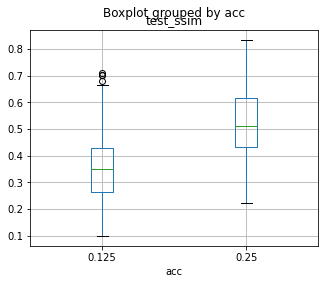

<Figure size 432x288 with 0 Axes>

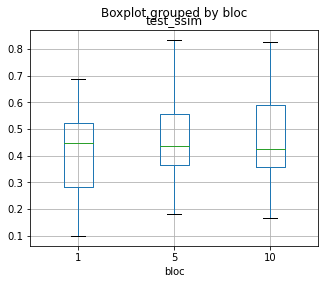

<Figure size 432x288 with 0 Axes>

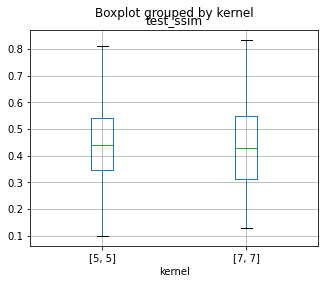

<Figure size 432x288 with 0 Axes>

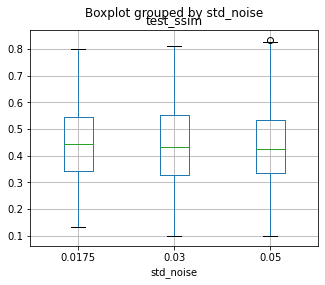

<Figure size 432x288 with 0 Axes>

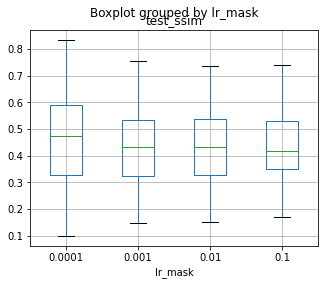

<Figure size 432x288 with 0 Axes>

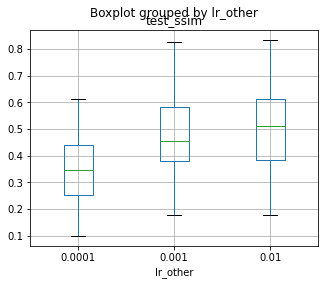

In [9]:
boxplot_hyper_single(general_grid_search_result_df_learned, 
                     hyperparam=['mask_dim','acc','bloc','kernel','std_noise','lr_mask','lr_other'], 
                     metrics=["test_ssim"])

<Figure size 432x288 with 0 Axes>

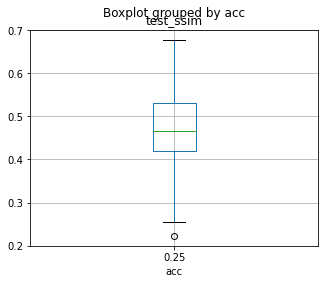

<Figure size 432x288 with 0 Axes>

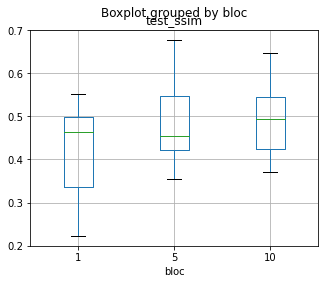

<Figure size 432x288 with 0 Axes>

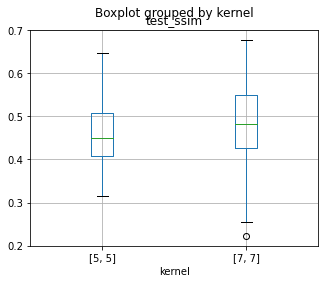

<Figure size 432x288 with 0 Axes>

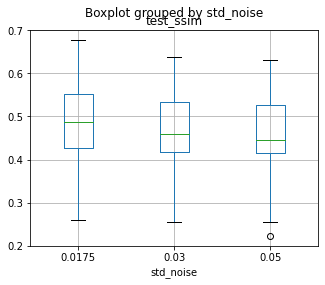

<Figure size 432x288 with 0 Axes>

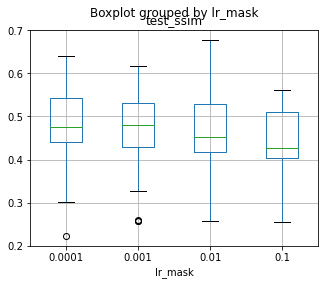

<Figure size 432x288 with 0 Axes>

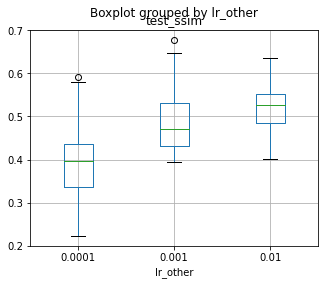

In [11]:
boxplot_hyper_single(general_grid_search_result_df_learned.query("mask_dim == '[4, 4]' and acc == 0.25"), 
                     hyperparam=['acc','bloc','kernel','std_noise','lr_mask','lr_other'], 
                     metrics=["test_ssim"])

### boxplot_hyper_pair


In [54]:
def boxplot_hyper_pair(df, hyperparam, metrics, figsize =(10,6),rot=0 ):
    
    for pair in itertools.combinations(hyperparam, r=2):
    #print(list(pair))
        
        if len(metrics)>1:
            fig, ax = plt.subplots(len(metrics),1,figsize=(20,18))
            for i in range(len(metrics)):
                df.boxplot(column=metrics[i], by = list(pair),ax = ax[i],rot=rot)
        else :
            fig, ax = plt.subplots(len(metrics),1,figsize=figsize)
            #ax.set_ylim([0, 0.25])
            df.boxplot(column=metrics, by = list(pair),ax = ax,rot=rot)
        
        #return ax

#https://stackoverflow.com/questions/942543/operation-on-every-pair-of-element-in-a-list            

C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

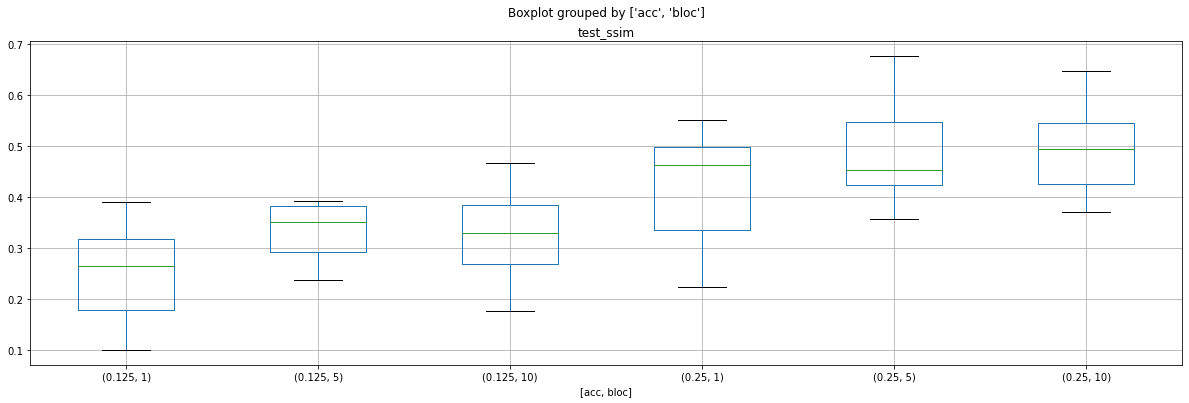

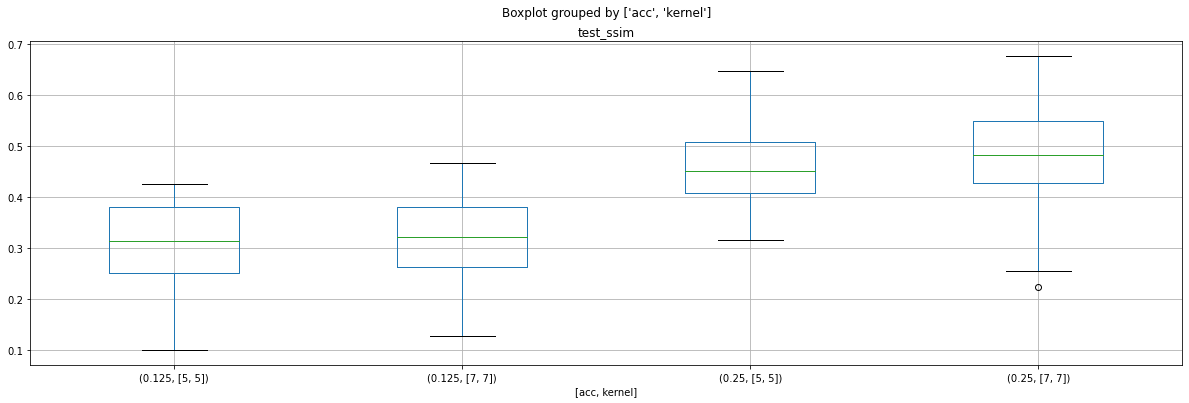

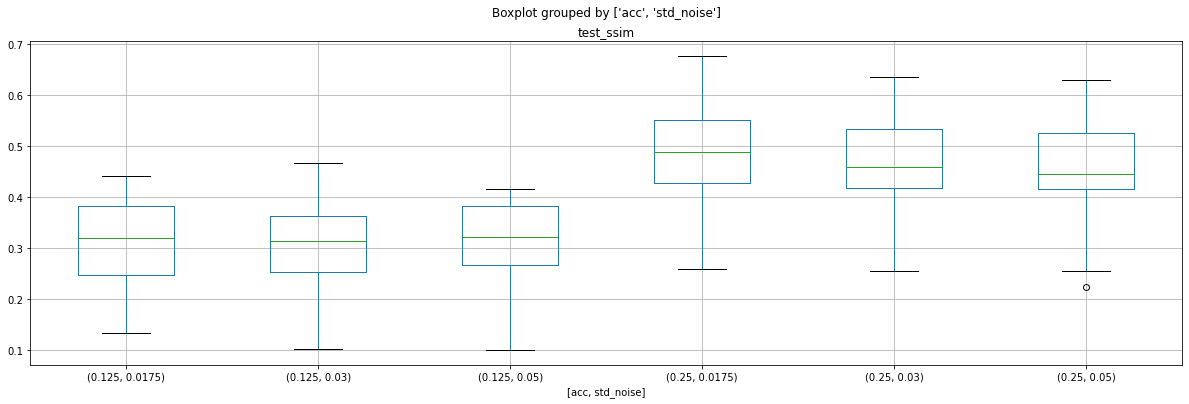

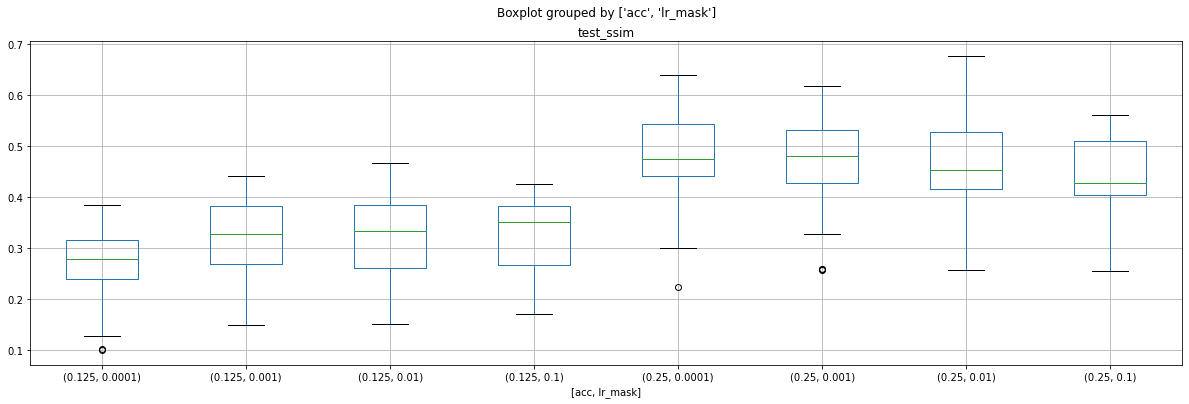

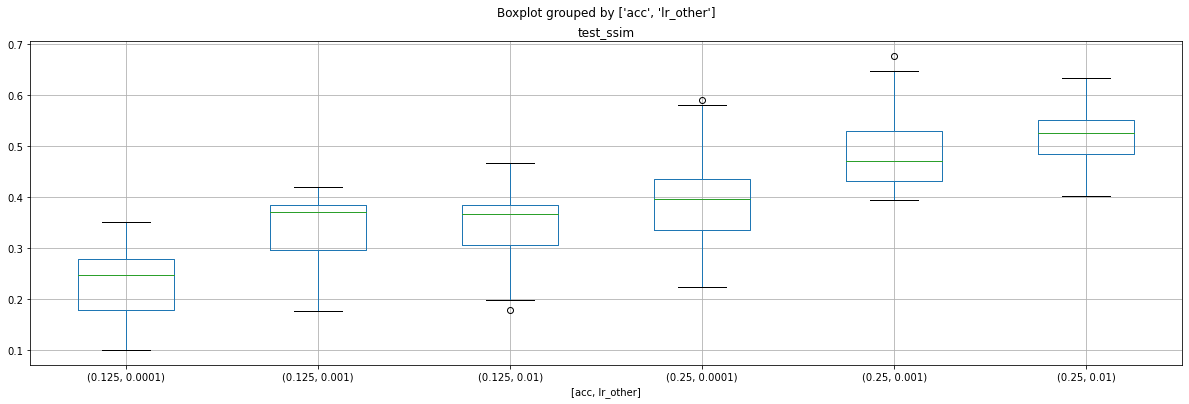

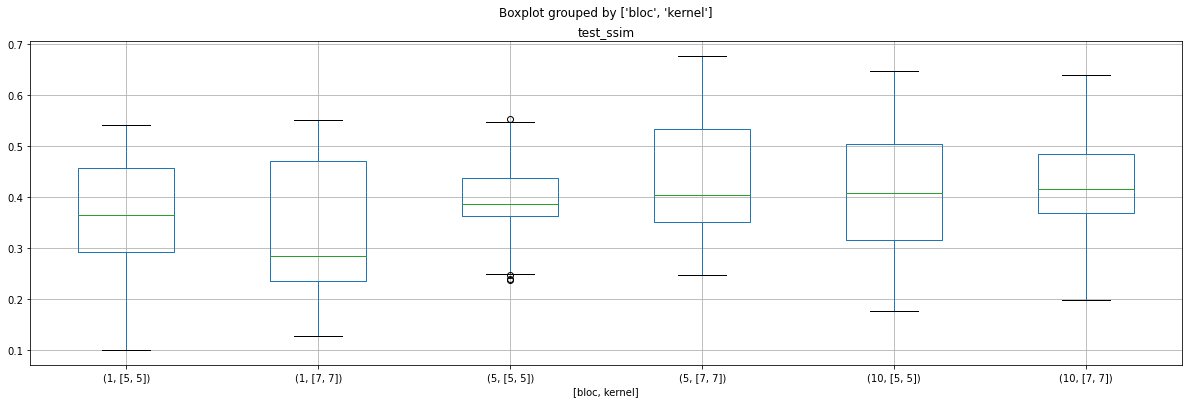

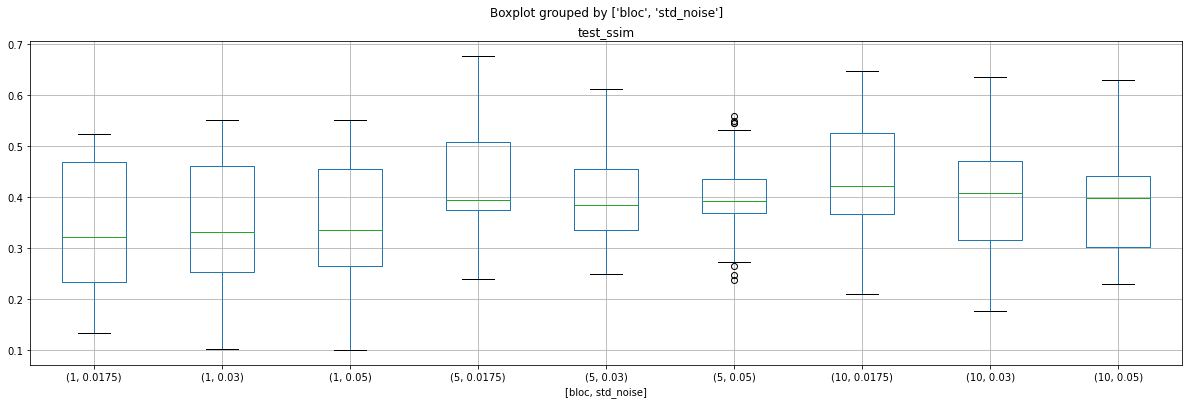

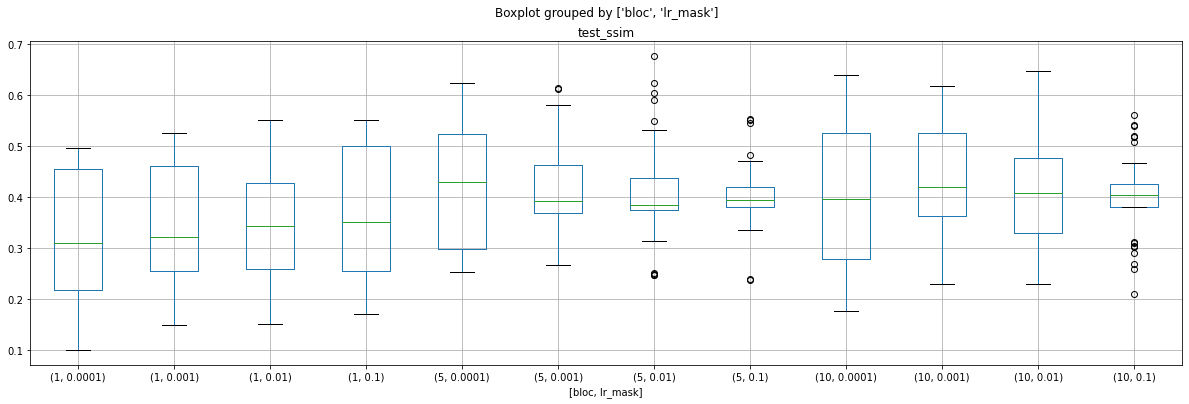

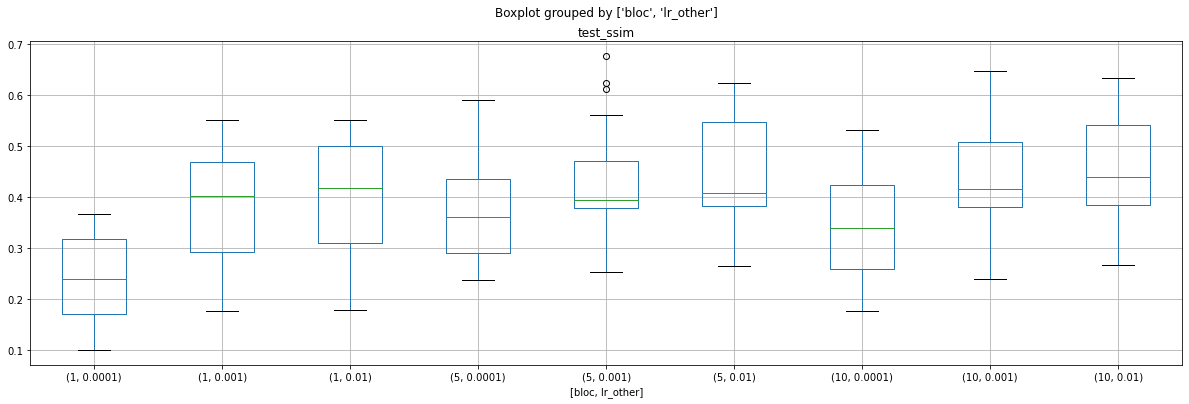

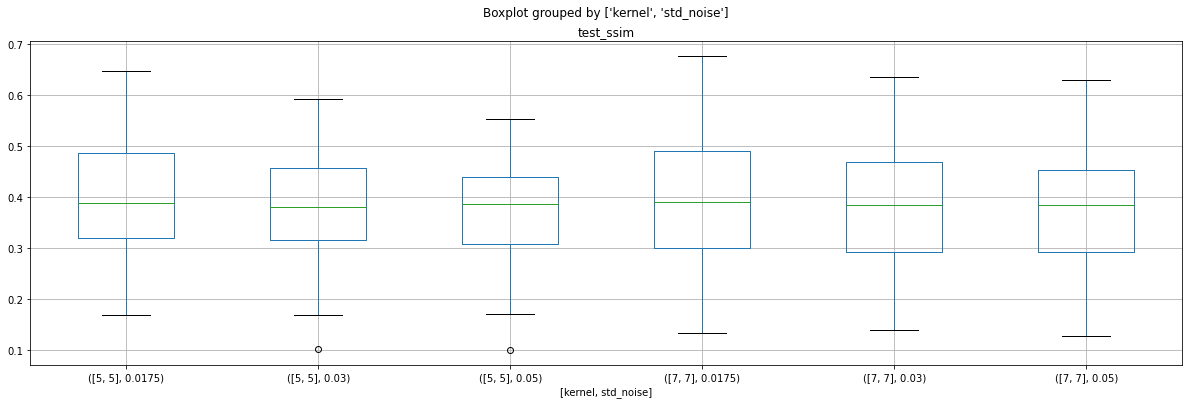

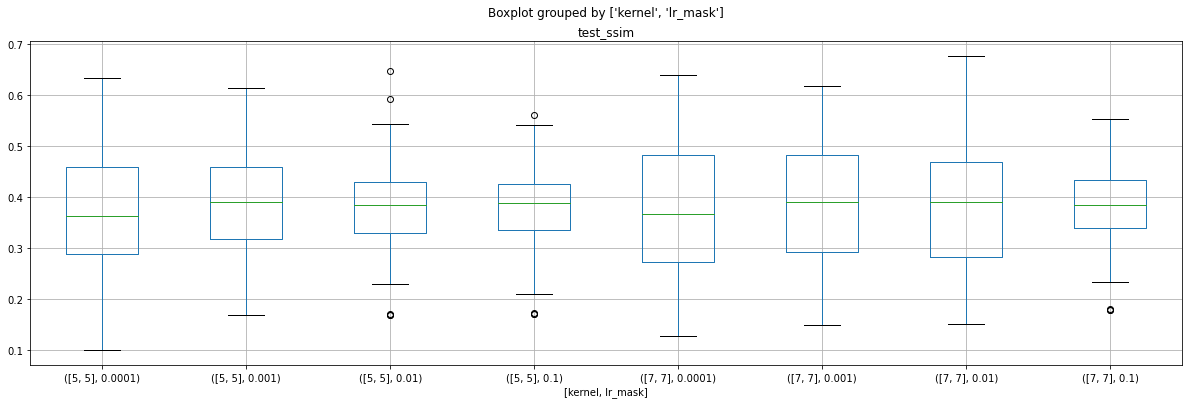

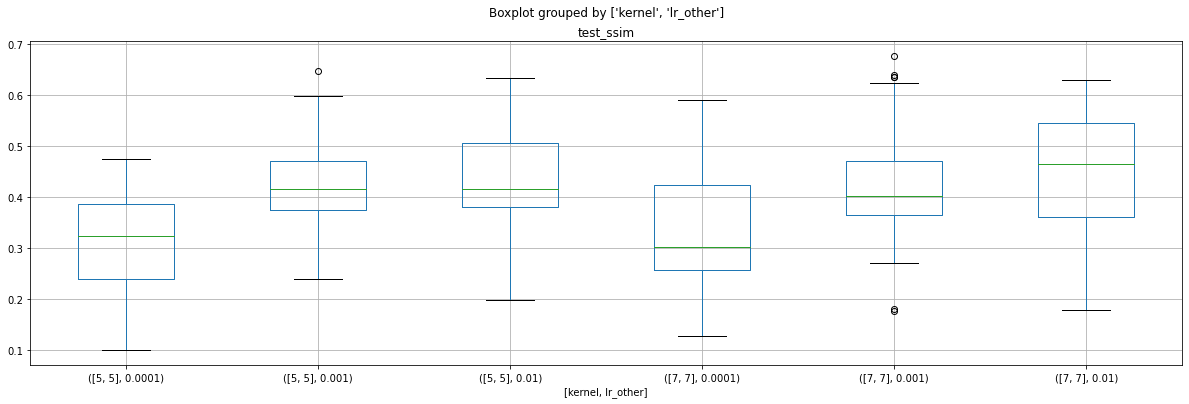

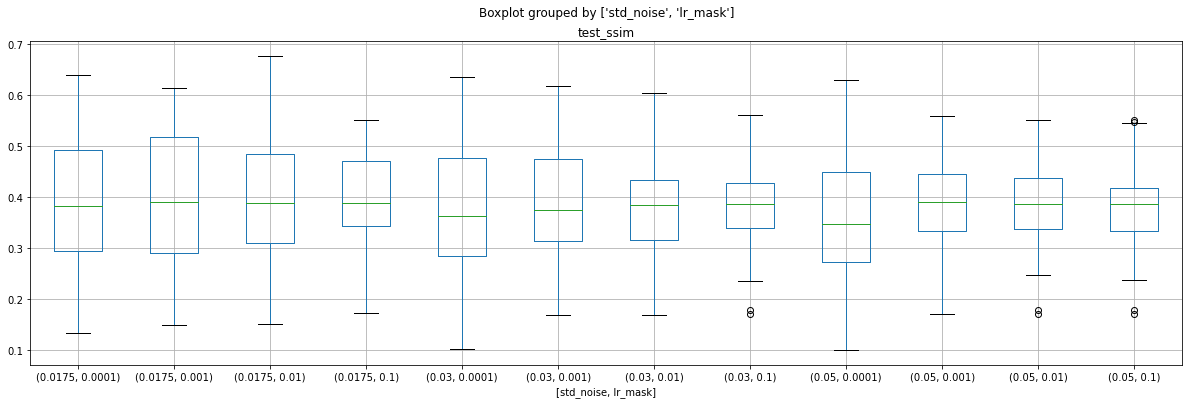

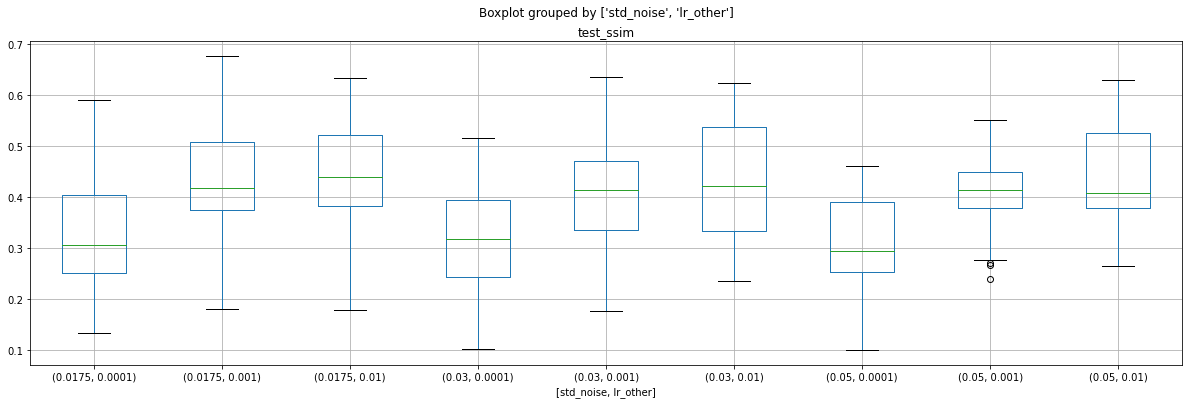

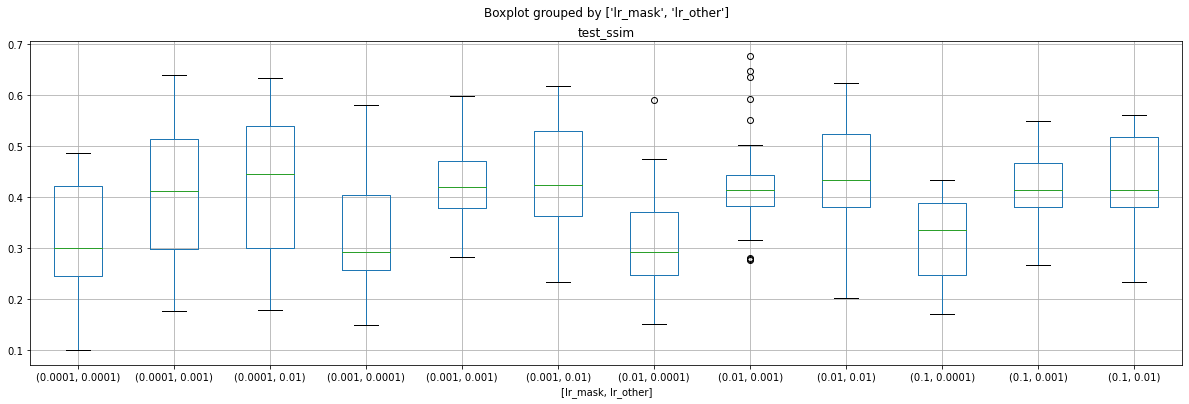

In [16]:
boxplot_hyper_pair(general_grid_search_result_df_learned.query('mask_dim == "[4, 4]"'), 
                   hyperparam=['acc','bloc','kernel','std_noise','lr_mask','lr_other'], 
                   metrics = ["test_ssim"],figsize =(20,6) )

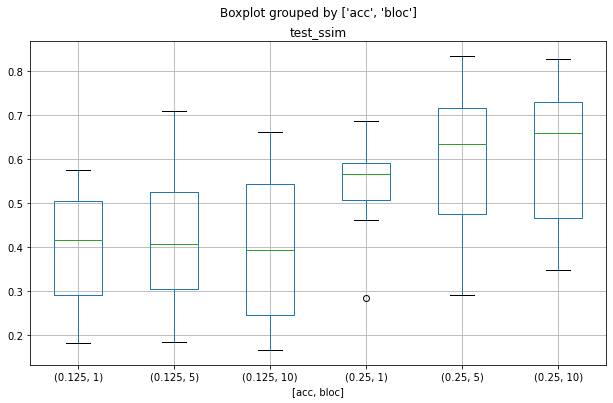

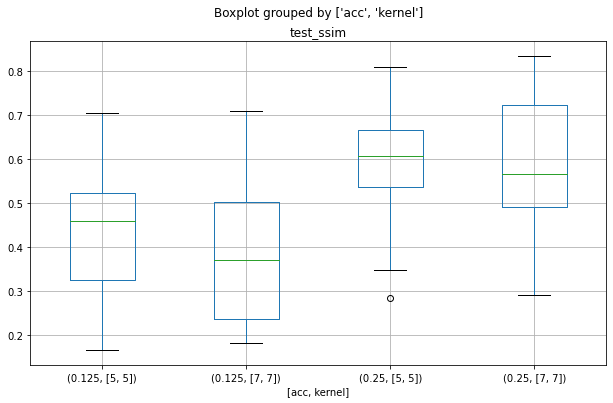

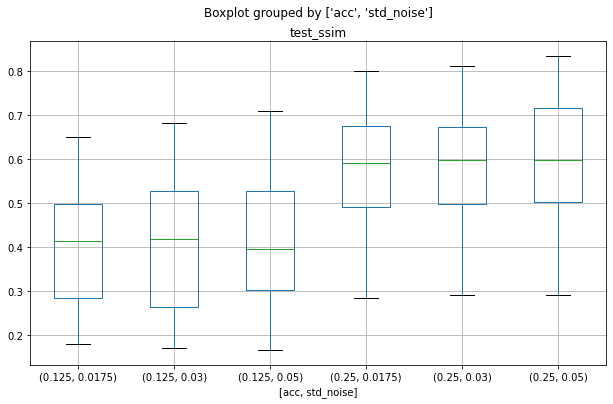

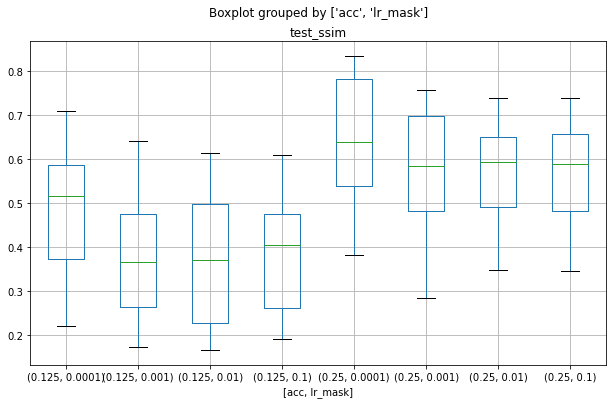

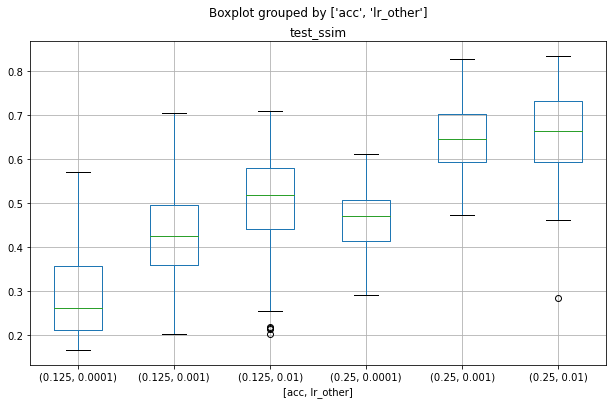

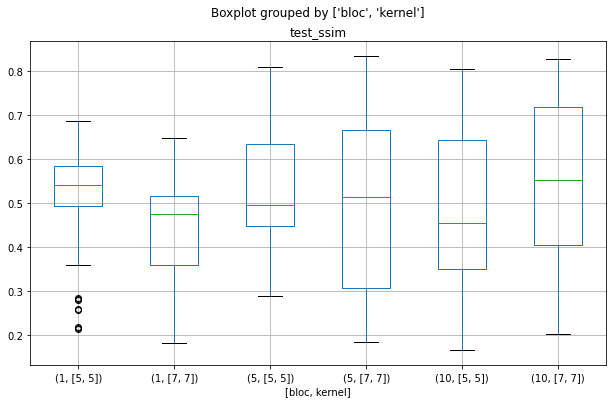

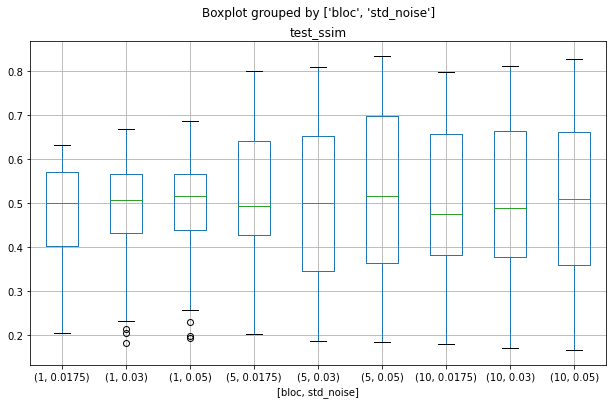

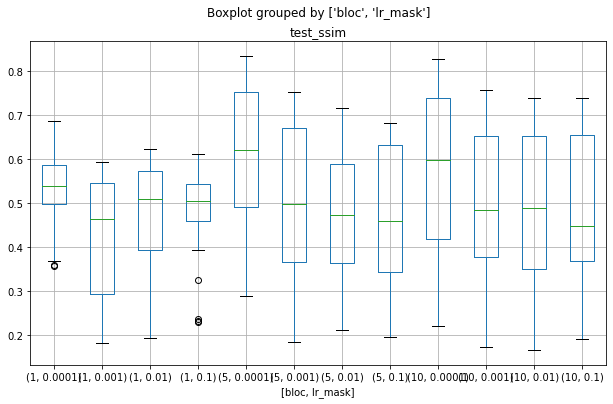

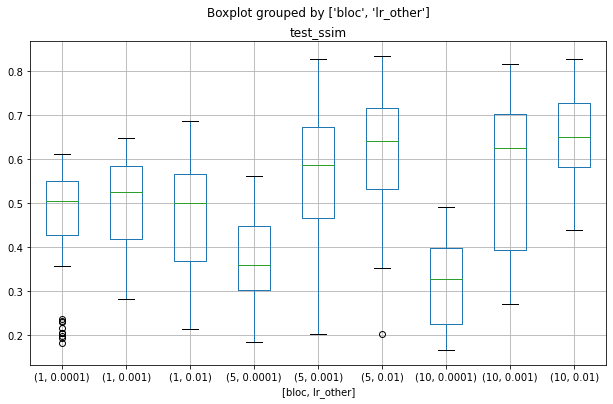

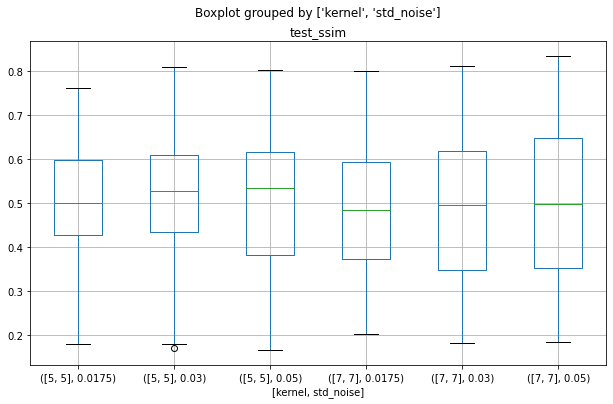

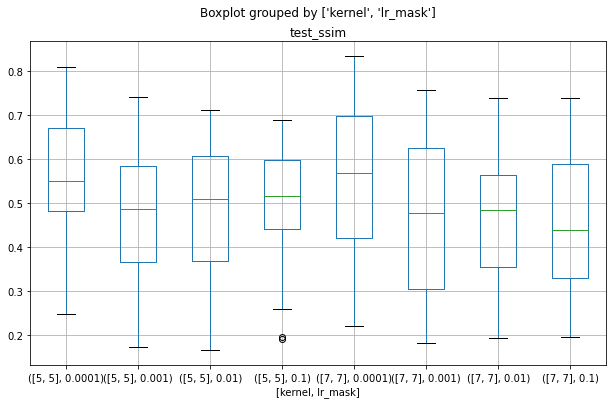

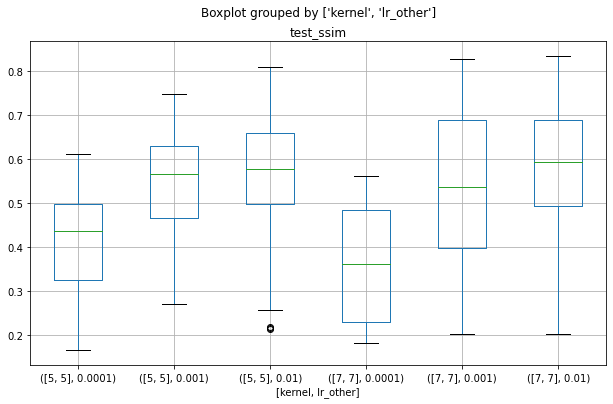

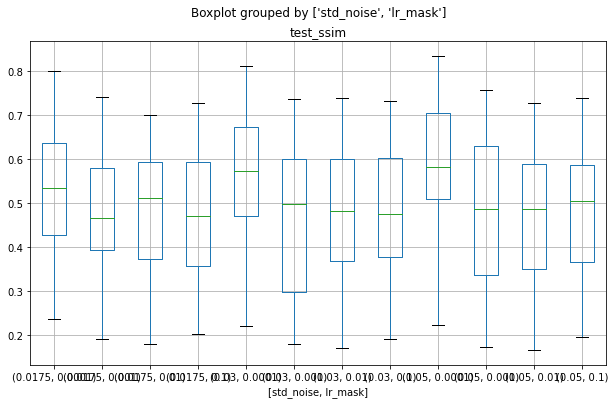

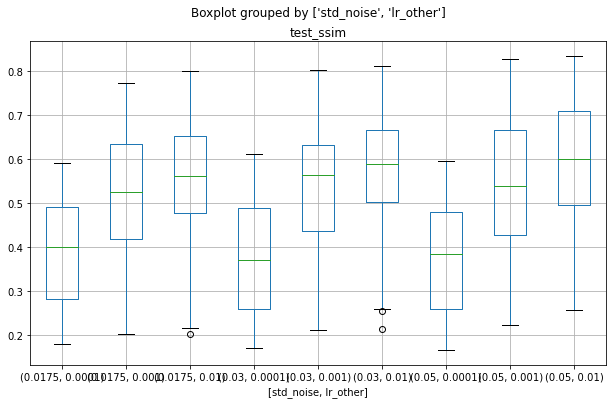

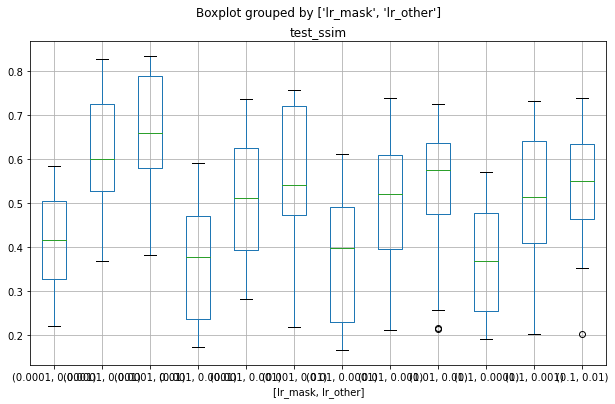

In [17]:
boxplot_hyper_pair(general_grid_search_result_df_learned.query('mask_dim == "[28, 28]"'), 
                   hyperparam=['acc','bloc','kernel','std_noise','lr_mask','lr_other'], 
                   metrics = ["test_ssim"])

### best models in terms of mse


In [43]:
def best_mse_per_hyperparam(dataframe,*argv,metric='test_loss'):
    
    hyperparam = [arg for arg in argv]
    
    if metric=='test_loss':
        idx = dataframe.groupby(hyperparam)[metric].transform(min) == dataframe[metric]
        
    else :
        idx = dataframe.groupby(hyperparam)[metric].transform(max) == dataframe[metric]
    
    best_result_df = dataframe[idx]
    
    #best_result_df[[var1,var2]] = best_result_df[['bloc','acc']]#.astype(int)        
    
    best_result_df.sort_values(by = hyperparam,inplace = True)

    #best_result_df.to_csv("./extracted_result/best_mse_per_bloc_k_local.csv", sep='\t') 

    return best_result_df

best_mse_per_hyperparam(general_grid_search_result_df_learned,'bloc','acc')



<ipython-input-43-d35788e47ec5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
356,"[28, 28]",0.125,1,"[5, 5]",0.0175,0.0100,0.0001,0.571023,13.345789,0.325412,0.032735
641,"[28, 28]",0.250,1,"[7, 7]",0.0500,0.0001,0.0010,0.647105,14.349198,0.200227,0.021358
498,"[28, 28]",0.125,5,"[7, 7]",0.0500,0.0001,0.0100,0.707794,16.078317,0.180146,0.019090
712,"[28, 28]",0.250,5,"[7, 7]",0.0500,0.0001,0.0100,0.834543,20.458126,0.078845,0.008349
572,"[28, 28]",0.125,10,"[7, 7]",0.0500,0.0001,0.0100,0.653973,14.843539,0.201233,0.020793
785,"[28, 28]",0.250,10,"[7, 7]",0.0500,0.0001,0.0100,0.827068,20.374040,0.088606,0.009582


In [19]:
best_mse_per_hyperparam(general_grid_search_result_df_learned.query('mask_dim=="[4, 4]"'),'bloc','acc')

<ipython-input-18-b22c74f87cf7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
0,"[4, 4]",0.125,1,"[5, 5]",0.0175,0.001,0.001,0.290576,10.434100,0.481918,0.052786
202,"[4, 4]",0.250,1,"[7, 7]",0.0500,0.010,0.010,0.529212,12.867955,0.310710,0.029863
798,"[4, 4]",0.125,5,"[7, 7]",0.0175,0.100,0.001,0.383968,11.330231,0.442495,0.046588
253,"[4, 4]",0.250,5,"[7, 7]",0.0175,0.010,0.001,0.677962,14.766501,0.259501,0.026192
127,"[4, 4]",0.125,10,"[7, 7]",0.0500,0.100,0.010,0.396173,11.524657,0.434858,0.046340
288,"[4, 4]",0.250,10,"[5, 5]",0.0175,0.010,0.001,0.646962,13.931224,0.264068,0.025790


In [20]:
best_mse_per_hyperparam(general_grid_search_result_df_learned,'lr_mask','lr_other')

<ipython-input-18-b22c74f87cf7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
631,"[28, 28]",0.25,1,"[7, 7]",0.0300,0.0001,0.0001,0.507019,12.679322,0.276253,0.028568
713,"[28, 28]",0.25,5,"[7, 7]",0.0500,0.0001,0.0010,0.826332,20.127497,0.092221,0.009918
712,"[28, 28]",0.25,5,"[7, 7]",0.0500,0.0001,0.0100,0.834543,20.458126,0.078845,0.008349
256,"[4, 4]",0.25,5,"[7, 7]",0.0175,0.0010,0.0001,0.580667,13.421892,0.276588,0.028645
710,"[28, 28]",0.25,5,"[7, 7]",0.0500,0.0010,0.0010,0.728533,16.438528,0.190629,0.020158
709,"[28, 28]",0.25,5,"[7, 7]",0.0500,0.0010,0.0100,0.752527,17.075846,0.138802,0.015203
587,"[28, 28]",0.25,1,"[5, 5]",0.0300,0.0100,0.0001,0.610705,13.884000,0.282998,0.028598
780,"[28, 28]",0.25,10,"[7, 7]",0.0500,0.0100,0.0010,0.727573,16.375989,0.183230,0.018387
777,"[28, 28]",0.25,10,"[7, 7]",0.0500,0.0100,0.0100,0.725631,16.610322,0.202179,0.019425
633,"[28, 28]",0.25,1,"[7, 7]",0.0500,0.1000,0.0001,0.504844,12.684936,0.305341,0.030812


In [21]:
best_mse_per_hyperparam(general_grid_search_result_df_learned,'acc','mask_dim')

<ipython-input-18-b22c74f87cf7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
498,"[28, 28]",0.125,5,"[7, 7]",0.0500,0.0001,0.010,0.707794,16.078317,0.180146,0.019090
127,"[4, 4]",0.125,10,"[7, 7]",0.0500,0.1000,0.010,0.396173,11.524657,0.434858,0.046340
712,"[28, 28]",0.250,5,"[7, 7]",0.0500,0.0001,0.010,0.834543,20.458126,0.078845,0.008349
253,"[4, 4]",0.250,5,"[7, 7]",0.0175,0.0100,0.001,0.677962,14.766501,0.259501,0.026192


### essai d'analyse toute chose étant égale par ailleurs

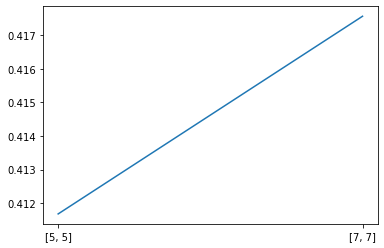

In [22]:
#for ['acc','bloc','std_noise','lr_mask','lr_other']

#for 


exemple_df = general_grid_search_result_df_learned[(general_grid_search_result_df_learned["std_noise"]==0.03) & 
(general_grid_search_result_df_learned["lr_mask"]==0.0001) &
(general_grid_search_result_df_learned["lr_other"]==0.0001) &
(general_grid_search_result_df_learned["acc"]==0.125) &
(general_grid_search_result_df_learned["mask_dim"]=="[28, 28]") &
(general_grid_search_result_df_learned["bloc"]==1)]

exemple_df

plt.plot(exemple_df["kernel"], exemple_df["test_loss"])



In [23]:
exemple_df

,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
376,"[28, 28]",0.125,1,"[5, 5]",0.03,0.0001,0.0001,0.480384,12.506887,0.411682,0.040863
414,"[28, 28]",0.125,1,"[7, 7]",0.03,0.0001,0.0001,0.355383,11.324867,0.417566,0.043400


count_sup :  230
count_inf :  202


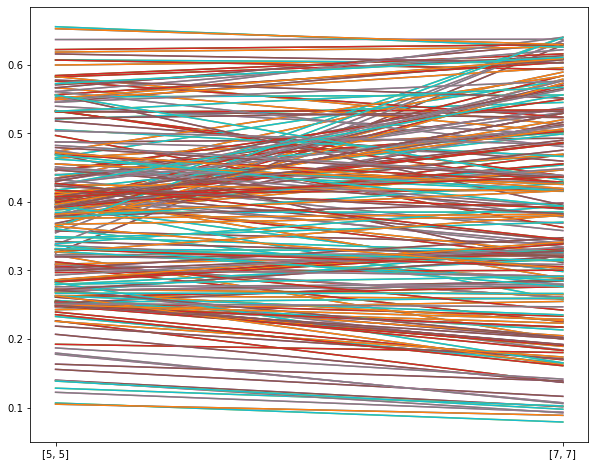

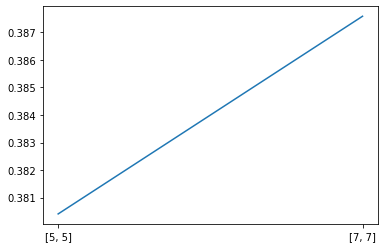

In [29]:
#for ['acc','bloc','std_noise','lr_mask','lr_other']

fig, ax = plt.subplots(figsize=(10,8))

count_sup =0; count_inf=0

caeterus_data = []

##analyse toute chose étant égale par ailleurs
for acc in general_grid_search_result_df_learned['acc'].unique():
    for std_noise in general_grid_search_result_df_learned['std_noise'].unique():
        for lr_mask in general_grid_search_result_df_learned['lr_mask'].unique():
            for lr_other in general_grid_search_result_df_learned['lr_other'].unique():
                for bloc in general_grid_search_result_df_learned['bloc'].unique():
                     for mask_dim in general_grid_search_result_df_learned['mask_dim'].unique():
        
        
                            exemple_df = general_grid_search_result_df_learned[(general_grid_search_result_df_learned["std_noise"]==std_noise) & 
                            (general_grid_search_result_df_learned["lr_mask"]==lr_mask) &
                            (general_grid_search_result_df_learned["lr_other"]==lr_other) &
                            (general_grid_search_result_df_learned["acc"]==acc) &
                            (general_grid_search_result_df_learned["mask_dim"]=="[28, 28]") &
                            (general_grid_search_result_df_learned["bloc"]==bloc)]
            
                            if exemple_df[exemple_df["kernel"]=="[5, 5]"]["test_loss"].item() > exemple_df[exemple_df["kernel"]=="[7, 7]"]["test_loss"].item() :
                                count_sup +=1
                            else :
                                count_inf +=1                    
            
                            plt.plot(exemple_df["kernel"], exemple_df["test_loss"])

                            caeterus_data.append(exemple_df)
                    
                                    
print("count_sup : ",count_sup)                
print("count_inf : ",count_inf)     

caeterus_data = pd.concat(caeterus_data, ignore_index=True)

plt.figure()
mean_caeterus_data = caeterus_data[["kernel","test_loss"]].groupby('kernel').mean()
plt.plot(mean_caeterus_data.reset_index()["kernel"], mean_caeterus_data.reset_index()["test_loss"])


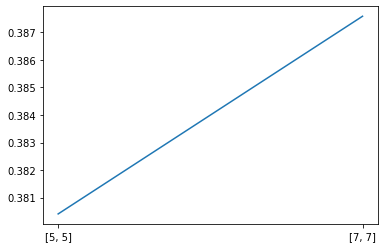

In [30]:
plt.plot(mean_caeterus_data.reset_index()["kernel"], mean_caeterus_data.reset_index()["test_loss"])


count_sup :  432
count_inf :  0


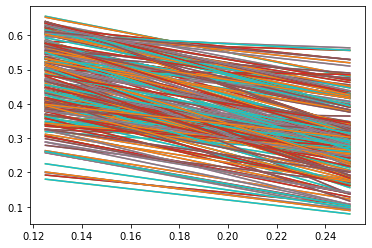

In [31]:
count_sup =0; count_inf=0

for kernel in general_grid_search_result_df_learned['kernel'].unique():
    for std_noise in general_grid_search_result_df_learned['std_noise'].unique():
        for lr_mask in general_grid_search_result_df_learned['lr_mask'].unique():
            for lr_other in general_grid_search_result_df_learned['lr_other'].unique():
                for bloc in general_grid_search_result_df_learned['bloc'].unique():
                     for mask_dim in general_grid_search_result_df_learned['mask_dim'].unique():
        
        
                            exemple_df = general_grid_search_result_df_learned[(general_grid_search_result_df_learned["std_noise"]==std_noise) & 
                            (general_grid_search_result_df_learned["lr_mask"]==lr_mask) &
                            (general_grid_search_result_df_learned["lr_other"]==lr_other) &
                            (general_grid_search_result_df_learned["kernel"]==kernel) &
                            (general_grid_search_result_df_learned["mask_dim"]=="[28, 28]") &
                            (general_grid_search_result_df_learned["bloc"]==bloc)]
            
                            if exemple_df[exemple_df["acc"]==0.125]["test_loss"].item() > exemple_df[exemple_df["acc"]==0.25]["test_loss"].item() :
                                count_sup +=1
                            else :
                                count_inf +=1                    
            
                            plt.plot(exemple_df["acc"], exemple_df["test_loss"])
                
print("count_sup : ",count_sup)                
print("count_inf : ",count_inf) 

count_sup :  432
count_inf :  0


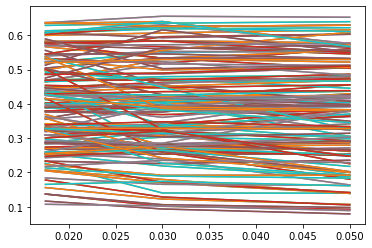

In [32]:
for kernel in general_grid_search_result_df_learned['kernel'].unique():
    for acc in general_grid_search_result_df_learned['acc'].unique():
    #for std_noise in general_grid_search_result_df_learned['std_noise'].unique():
        for lr_mask in general_grid_search_result_df_learned['lr_mask'].unique():
            for lr_other in general_grid_search_result_df_learned['lr_other'].unique():
                for bloc in general_grid_search_result_df_learned['bloc'].unique():
                     for mask_dim in general_grid_search_result_df_learned['mask_dim'].unique():
        
        
                            exemple_df = general_grid_search_result_df_learned[(general_grid_search_result_df_learned["acc"]==acc) & 
                            (general_grid_search_result_df_learned["lr_mask"]==lr_mask) &
                            (general_grid_search_result_df_learned["lr_other"]==lr_other) &
                            (general_grid_search_result_df_learned["kernel"]==kernel) &
                            (general_grid_search_result_df_learned["mask_dim"]=="[28, 28]") &
                            (general_grid_search_result_df_learned["bloc"]==bloc)]
            
                            """if exemple_df[exemple_df["acc"]==0.125]["test_loss"].item() > exemple_df[exemple_df["acc"]==0.25]["test_loss"].item() :
                                count_sup +=1
                            else :
                                count_inf +=1                    
"""            
                            plt.plot(exemple_df["std_noise"], exemple_df["test_loss"])
                
print("count_sup : ",count_sup)                
print("count_inf : ",count_inf) 

count_sup :  432
count_inf :  0


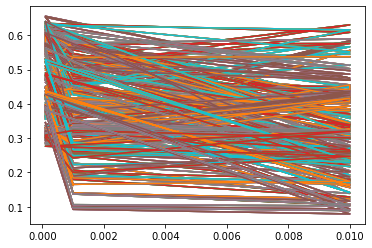

In [33]:
for kernel in general_grid_search_result_df_learned['kernel'].unique():
    for acc in general_grid_search_result_df_learned['acc'].unique():
        for std_noise in general_grid_search_result_df_learned['std_noise'].unique():
            for lr_mask in general_grid_search_result_df_learned['lr_mask'].unique():
                #for lr_other in general_grid_search_result_df_learned['lr_other'].unique():
                for bloc in general_grid_search_result_df_learned['bloc'].unique():
                    for mask_dim in general_grid_search_result_df_learned['mask_dim'].unique():
        
        
                            exemple_df = general_grid_search_result_df_learned[(general_grid_search_result_df_learned["acc"]==acc) & 
                            (general_grid_search_result_df_learned["lr_mask"]==lr_mask) &
                            #(general_grid_search_result_df_learned["lr_other"]==lr_other) &
                            (general_grid_search_result_df_learned["kernel"]==kernel) &
                            (general_grid_search_result_df_learned["mask_dim"]=="[28, 28]") &
                            (general_grid_search_result_df_learned["bloc"]==bloc)]
            
                            """if exemple_df[exemple_df["acc"]==0.125]["test_loss"].item() > exemple_df[exemple_df["acc"]==0.25]["test_loss"].item() :
                                count_sup +=1
                            else :
                                count_inf +=1                    
"""            
                            plt.plot(exemple_df["lr_other"], exemple_df["test_loss"])
                
print("count_sup : ",count_sup)                
print("count_inf : ",count_inf) 

count_sup :  432
count_inf :  0


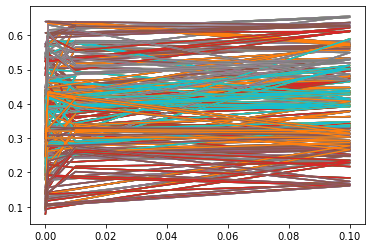

In [34]:
for kernel in general_grid_search_result_df_learned['kernel'].unique():
    for acc in general_grid_search_result_df_learned['acc'].unique():
        for std_noise in general_grid_search_result_df_learned['std_noise'].unique():
            #for lr_mask in general_grid_search_result_df_learned['lr_mask'].unique():
            for lr_other in general_grid_search_result_df_learned['lr_other'].unique():
                for bloc in general_grid_search_result_df_learned['bloc'].unique():
                    for mask_dim in general_grid_search_result_df_learned['mask_dim'].unique():
        
        
                            exemple_df = general_grid_search_result_df_learned[(general_grid_search_result_df_learned["acc"]==acc) & 
                            #(general_grid_search_result_df_learned["lr_mask"]==lr_mask) &
                            (general_grid_search_result_df_learned["lr_other"]==lr_other) &
                            (general_grid_search_result_df_learned["kernel"]==kernel) &
                            (general_grid_search_result_df_learned["mask_dim"]=="[28, 28]") &
                            (general_grid_search_result_df_learned["bloc"]==bloc)]
            
                            """if exemple_df[exemple_df["acc"]==0.125]["test_loss"].item() > exemple_df[exemple_df["acc"]==0.25]["test_loss"].item() :
                                count_sup +=1
                            else :
                                count_inf +=1                    
"""            
                            plt.plot(exemple_df["lr_mask"], exemple_df["test_loss"])
                
print("count_sup : ",count_sup)                
print("count_inf : ",count_inf) 

count_sup :  432
count_inf :  0


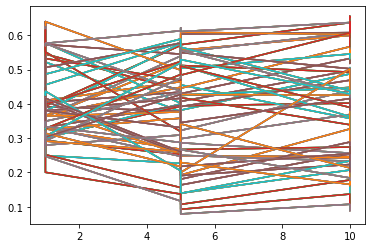

In [35]:
for kernel in general_grid_search_result_df_learned['kernel'].unique():
    for acc in general_grid_search_result_df_learned['acc'].unique():
        for std_noise in general_grid_search_result_df_learned['std_noise'].unique():
            for lr_mask in general_grid_search_result_df_learned['lr_mask'].unique():
                for lr_other in general_grid_search_result_df_learned['lr_other'].unique():
                    #for bloc in general_grid_search_result_df_learned['bloc'].unique():
                        for mask_dim in general_grid_search_result_df_learned['mask_dim'].unique():

        
                            exemple_df = general_grid_search_result_df_learned[(general_grid_search_result_df_learned["acc"]==acc) & 
                            (general_grid_search_result_df_learned["lr_mask"]==lr_mask) &
                            (general_grid_search_result_df_learned["lr_other"]==lr_other) &
                            (general_grid_search_result_df_learned["kernel"]==kernel) &
                            (general_grid_search_result_df_learned["mask_dim"]=="[28, 28]") #&
                            #(general_grid_search_result_df_learned["bloc"]==bloc)
                            ]
            
                            """if exemple_df[exemple_df["acc"]==0.125]["test_loss"].item() > exemple_df[exemple_df["acc"]==0.25]["test_loss"].item() :
                                count_sup +=1
                            else :
                                count_inf +=1                    
"""            
                            plt.plot(exemple_df["bloc"], exemple_df["test_loss"])
                
print("count_sup : ",count_sup)                
print("count_inf : ",count_inf) 

# <font color='darkblue'> Analyse fixed mask result

In [36]:
general_grid_search_result_df_fixed.head()

,mask_typ,mask_seed,mask_dim,bloc,kernel,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
0,caipiranha,42083,"[4, 4]",1,"[5, 5]",0.10000,0.539857,11.884347,0.437958,0.043690
1,caipiranha,42083,"[4, 4]",1,"[7, 7]",0.10000,0.537300,11.905622,0.434314,0.043248
2,caipiranha,42083,"[4, 4]",1,"[5, 5]",0.01000,0.530482,11.904886,0.436539,0.043832
3,caipiranha,42083,"[4, 4]",1,"[5, 5]",0.00001,0.198705,8.838435,0.795417,0.083454
4,caipiranha,42083,"[4, 4]",5,"[5, 5]",0.10000,0.505756,11.771559,0.440188,0.044657


In [37]:
general_grid_search_result_df_fixed.isnull().values.any()

False

In [38]:
len(general_grid_search_result_df_fixed)

986

### best models in terms of mse


In [40]:

best_mse_per_hyperparam(general_grid_search_result_df_fixed,'mask_typ')

<ipython-input-18-b22c74f87cf7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_typ,mask_seed,mask_dim,bloc,kernel,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
12,2D_uniform,71825,"[4, 4]",10,"[7, 7]",0.010,0.730677,15.191562,0.224969,0.025309
828,caipiranha,42083,"[4, 4]",10,"[7, 7]",0.001,0.535961,11.944490,0.426836,0.042728
742,random,86672,"[4, 4]",10,"[7, 7]",0.010,0.609604,14.029476,0.241421,0.023889
874,uniform,99535,"[4, 4]",10,"[7, 7]",0.010,0.405020,11.500105,0.574596,0.054664


In [44]:
best_mse_per_hyperparam(general_grid_search_result_df_fixed,'mask_typ',metric = 'test_ssim')

<ipython-input-43-d35788e47ec5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_typ,mask_seed,mask_dim,bloc,kernel,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
826,2D_uniform,71825,"[4, 4]",1,"[7, 7]",0.010,0.742798,15.115474,0.233031,0.026479
810,caipiranha,42083,"[4, 4]",1,"[7, 7]",0.001,0.545314,11.887282,0.431507,0.043259
769,random,55818,"[4, 4]",10,"[7, 7]",0.010,0.624645,14.070158,0.295461,0.026987
874,uniform,99535,"[4, 4]",10,"[7, 7]",0.010,0.405020,11.500105,0.574596,0.054664


In [ ]:
best_mse_per_hyperparam(general_grid_search_result_df_fixed,'mask_typ','bloc')

### boxplot_for each hyperparam


C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

<Figure size 432x288 with 0 Axes>

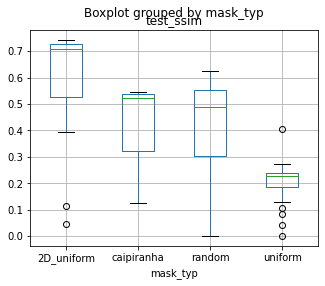

<Figure size 432x288 with 0 Axes>

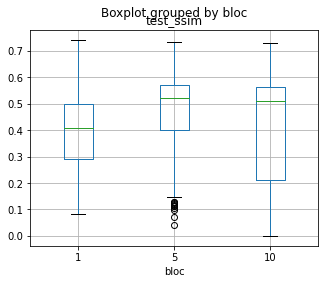

<Figure size 432x288 with 0 Axes>

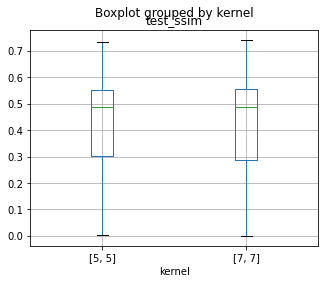

<Figure size 432x288 with 0 Axes>

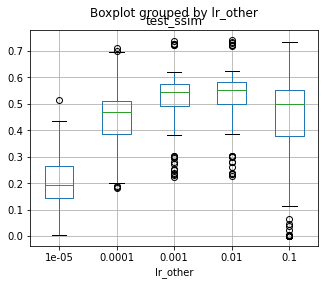

In [45]:
boxplot_hyper_single(general_grid_search_result_df_fixed, 
                     hyperparam=['mask_typ','bloc','kernel','lr_other'], 
                     metrics=["test_ssim"])

### boxplot_hyper_pair


C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

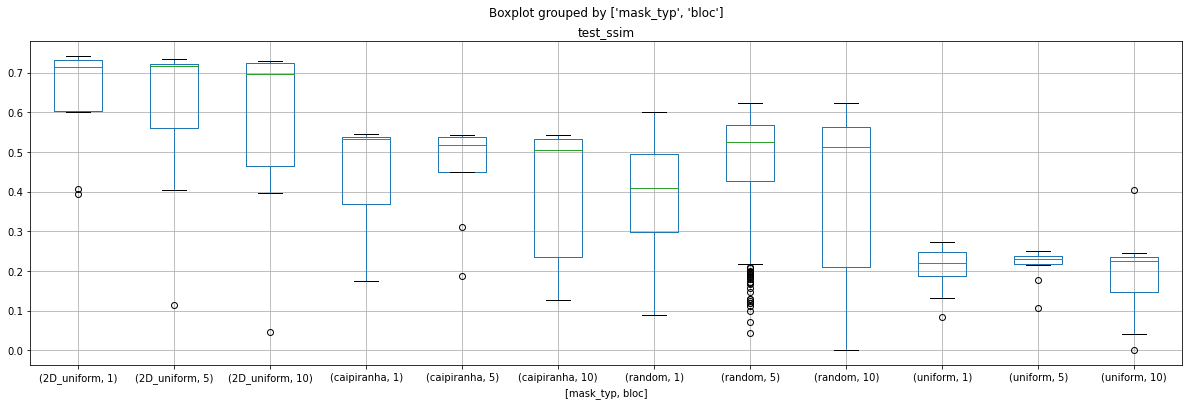

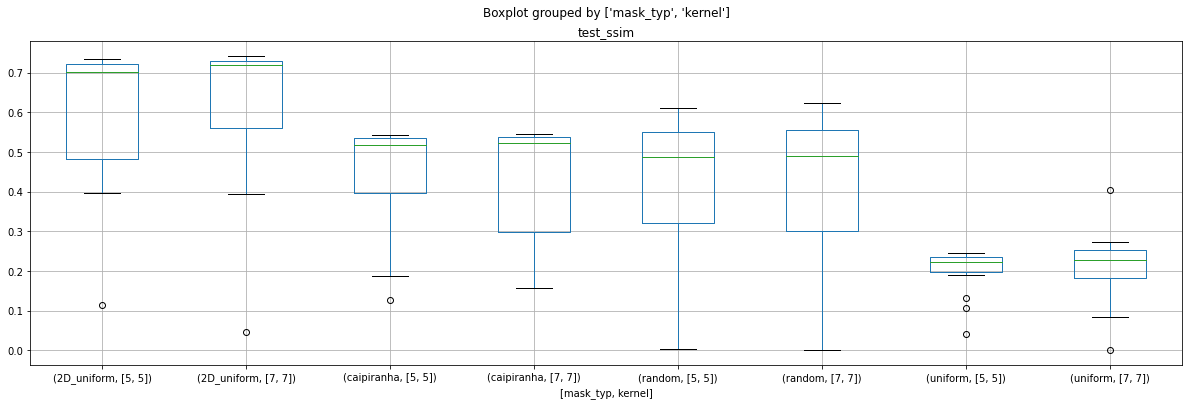

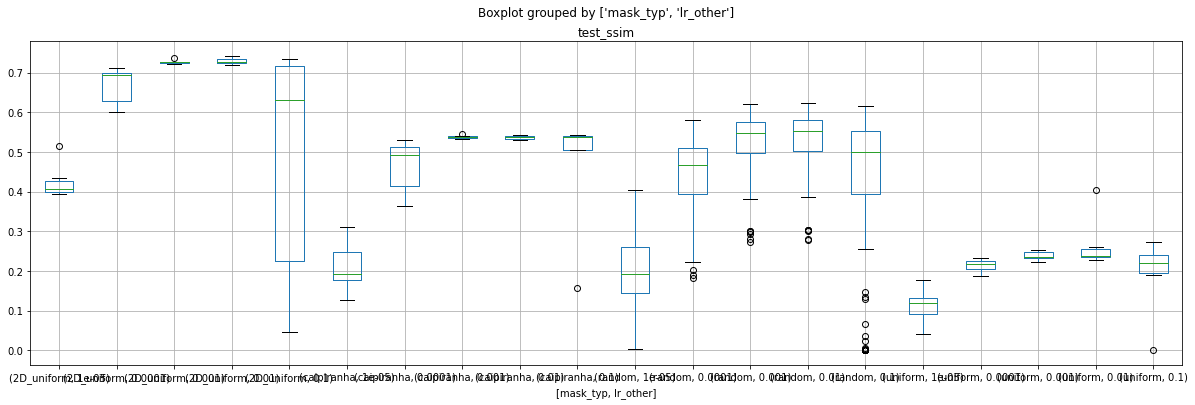

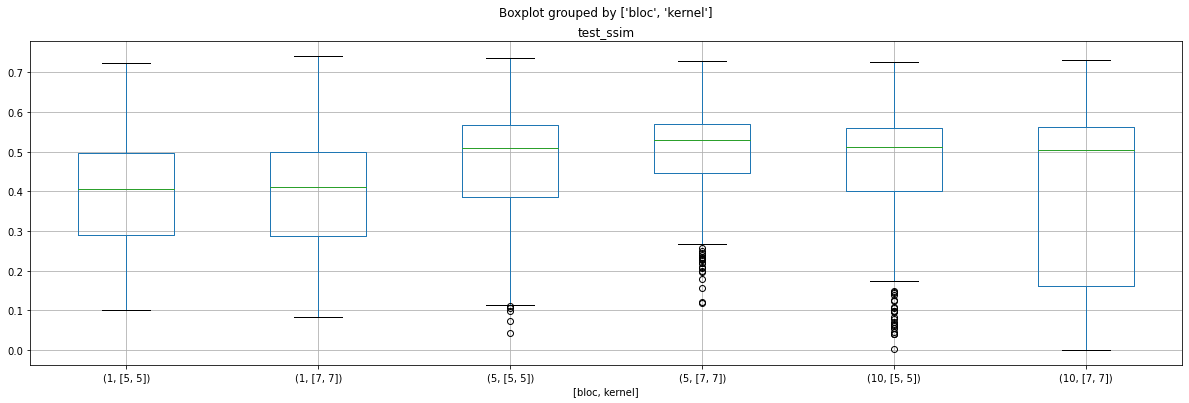

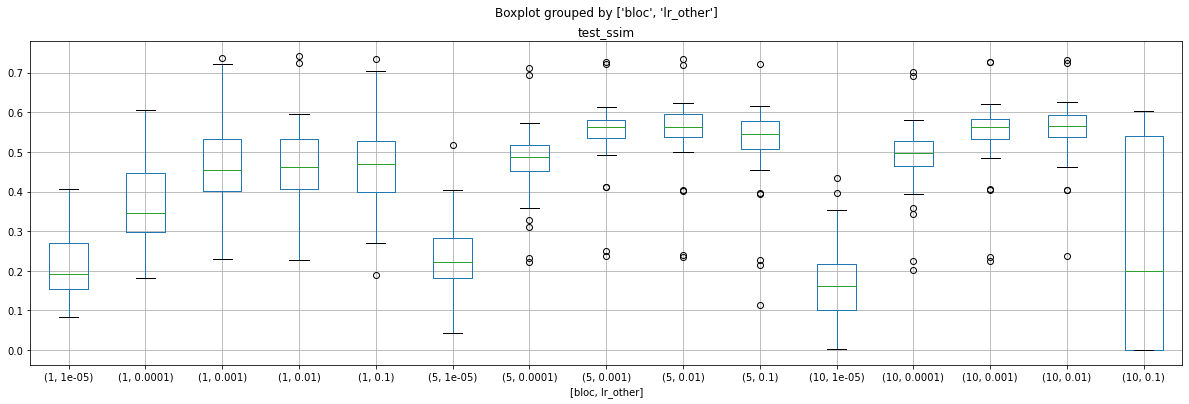

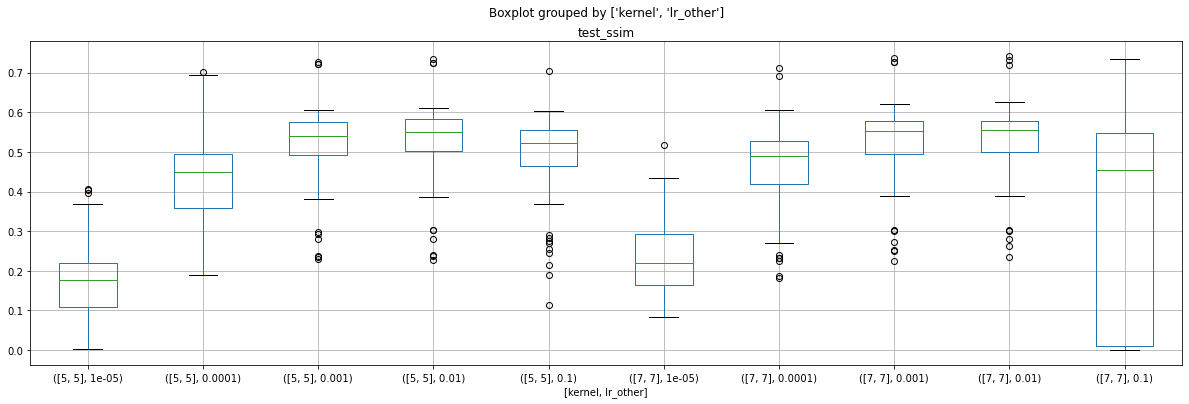

In [49]:
ax = boxplot_hyper_pair(general_grid_search_result_df_fixed.query('mask_dim == "[4, 4]"'),  ## certes il n'y a que [4, 4]
                   hyperparam= ['mask_typ','bloc','kernel','lr_other'], 
                   metrics = ["test_ssim"], figsize=(20,6))

#ax.set_ylim([0, 3])



C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


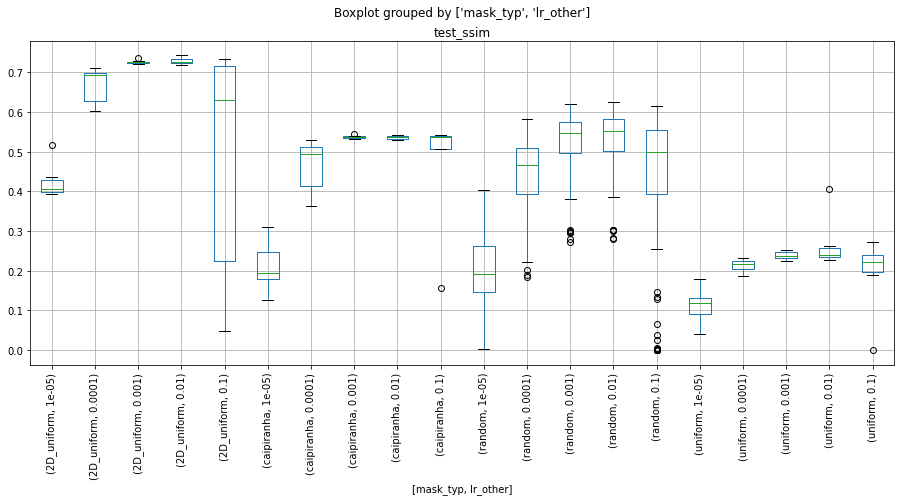

In [56]:
ax = boxplot_hyper_pair(general_grid_search_result_df_fixed.query('mask_dim == "[4, 4]"'),  ## certes il n'y a que [4, 4]
                   hyperparam= ['mask_typ','lr_other'], 
                   metrics = ["test_ssim"], figsize=(15,6),rot=90)

### essai d'analyse toute chose étant égale par ailleurs

In [59]:
qsi = pd.read_csv("D:/result_final/general_grid_search_result_df.csv", sep ="\t")

In [60]:
len(qsi)

787

In [ ]:
mask_dim_4_4_acc_0.125_spirit_bloc_10_std_noise_0.03_kernel_5_5_lr_mask_0.001_lr_other_0.001

In [ ]:
qsi[]

In [ ]:
general_grid_search_result_df_learned[]

In [ ]:
general_grid_search_result_df_learned[]

In [77]:
tmp = {"mask_dim":"[4, 4]","acc":0.25 ,"bloc":10} #, "std_noise":0.03 ,"kernel":"[5, 5]" ,"lr_mask":0.001,"lr_other": 0.001}

qry = ' and '.join(["{} == {}".format(k,v) for k,v in tmp.items()])    

general_grid_search_result_df_learned.query(qry)


,Unnamed: 0.1,Unnamed: 0,mask_dim,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm


In [78]:
qry

'mask_dim == [4, 4] and acc == 0.25 and bloc == 10'

In [ ]:
general_grid_search_result_df_learned[a]

In [82]:
#pip install parse
import parse

config_name = "./mask_dim_4_4_acc_0.125_spirit_bloc_10_std_noise_0.03_kernel_5_5_lr_mask_0.0001_lr_other_0.01"

format_string_config = "./mask_dim_{mask_dim[0]}_{mask_dim[1]}_acc_{acc}_spirit_bloc_{bloc}_std_noise_{std_noise}_kernel_{kernel[0]}_{kernel[1]}_lr_mask_{lr_mask}_lr_other_{lr_other}"

#format_string_exp_name = "spirit_bloc : {bloc} ; k_local {k_local};norm {norm} ; kernel : {kernel}; std_noise : {std_noise}; lr_mask : {lr_mask}; lr_other : {lr_other}"

parsed_config = parse.parse(format_string_config, config_name)  

parsed_config_named = parsed_config.named

parsed_config_named

{'mask_dim': {'0': '4', '1': '4'},
 'acc': '0.125',
 'bloc': '10',
 'std_noise': '0.03',
 'kernel': {'0': '5', '1': '5'},
 'lr_mask': '0.0001',
 'lr_other': '0.01'}

In [85]:
list(parsed_config_named["mask_dim"].values())

['4', '4']

In [92]:
import re

def convert_list(a): #a is a string like "[3,3]" or ["3", "3"]
    if type(a) == str:
        return [int(dim) for dim in  re.sub('\[|\]','',a).split(",")]
    elif type(a) == list:
        return [int(dim) for dim in  a]
        

In [93]:
convert_list(list(parsed_config_named["mask_dim"].values()))

[4, 4]

In [97]:
convert_list(list(parsed_config_named["kernel"].values()))

[5, 5]

In [96]:
convert_list("[3,3]" )

[3, 3]

In [127]:
float(parsed_config_named["acc"])

0.125

In [129]:
config_name = "./mask_typ_caipiranha_mask_seed_42083_mask_dim_4_4_spirit_bloc_10_kernel_5_5_lr_other_0.001"


format_string_config = "./mask_typ_{mask_typ}_mask_seed_{mask_seed}_mask_dim_{mask_dim[0]}_{mask_dim[1]}_spirit_bloc_{spirit_block}_kernel_{kernel1[0]}_{kernel1[1]}_lr_other_{lr_other}"

#format_string_exp_name = "spirit_bloc : {bloc} ; k_local {k_local};norm {norm} ; kernel : {kernel}; std_noise : {std_noise}; lr_mask : {lr_mask}; lr_other : {lr_other}"

parsed_config = parse.parse(format_string_config, config_name)  

parsed_config_named = parsed_config.named

parsed_config_named

{'mask_typ': 'caipiranha',
 'mask_seed': '42083',
 'mask_dim': {'0': '4', '1': '4'},
 'spirit_block': '10',
 'kernel1': {'0': '5', '1': '5'},
 'lr_other': '0.001'}

In [130]:
convert_list(list(parsed_config_named["kernel1"].values()))

[5, 5]

In [3]:
az =np.arange(16).reshape(4,4)
az

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [5]:
az[3,0]

12

In [9]:
az[np.ix_([2,3],[0,1])]

array([[ 8,  9],
       [12, 13]])

In [23]:
az[3:4,0:1]

array([[12]])

In [20]:
az[2:4,0:2]

array([[ 8,  9],
       [12, 13]])

In [21]:
az[1:4,0:3]

array([[ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14]])

In [22]:
az[0:4,0:4]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [27]:
az[0:3,1:4]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [28]:
az[0:2,2:4]

array([[2, 3],
       [6, 7]])

In [29]:
az[0:1,3:4]

array([[3]])

In [35]:
def select_subdiag(array):
    u = array.shape[0]
    for i in range(1,u+1):
        print(array[u-i:u, 0:i])
        print()
    for j in range(1,u):
        print(array[0:u-j, j:u])
        print()

In [36]:
select_subdiag(az)


[[12]]

[[ 8  9]
 [12 13]]

[[ 4  5  6]
 [ 8  9 10]
 [12 13 14]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]

[[2 3]
 [6 7]]

[[3]]



In [42]:
np.diagonal(az, offset =-3)

array([12])